# 데이터마이닝 프로젝트

### 정보통신공학과 12181785 서혜빈

## 01 라이브러리 불러오기

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

## 02 Data preparation

### (1) 데이터 불러오기

#### 1) 날씨 데이터

In [2]:
weather_path = 'weather.csv'
# read_csv() 함수로 데이터를 데이터 프레임 형태로 불러옵니다.
weather = pd.read_csv(weather_path, encoding = 'CP949')

In [3]:
# 데이터 확인
weather.head()

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),일 최심신적설(cm),일 최심적설(cm)
0,112,인천,2010-10-01,17.2,NaN,1.7,NaN,NaN
1,112,인천,2010-10-02,16.9,17.5,2.1,NaN,NaN
2,112,인천,2010-10-03,17.8,7.5,3.4,NaN,NaN
3,112,인천,2010-10-04,14.9,3.0,3.9,NaN,NaN
4,112,인천,2010-10-05,15.6,NaN,2.0,NaN,NaN


In [4]:
## 불필요한 columns 삭제
drop_weather = ['지점', '지점명']
weather = weather.drop(drop_weather, axis=1)

#### 2) 인천 공공시설물 예약 내역 데이터

In [5]:
reservation_path = 'reservation.csv'
reservation = pd.read_csv(reservation_path, encoding = 'CP949')

In [6]:
reservation.head() # 데이터 확인

,사업부서,대관시설,예약접수일,단체명,단체구분,인원,이용시작일,이용종료일
0,인천대공원,대공원풋살장,2010-10-26,NaN,Y,1.0,2010-10-27,2010-10-27
1,인천대공원,대공원풋살장,2010-10-26,NaN,Y,1.0,2010-10-27,2010-10-27
2,인천대공원,대공원축구장,2010-11-01,운봉공고,Y,1.0,2010-11-05,2010-11-05
3,인천대공원,대공원축구장,2010-11-01,(주)태평양제약,Y,1.0,2010-11-02,2010-11-02
4,인천대공원,중앙공원축구장,2010-11-01,축구사랑,Y,1.0,2010-11-04,2010-11-04


#### 3) 두 데이터프레임 정보 확인

In [7]:
weather.info()
reservation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3378 entries, 0 to 3377
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   일시           3378 non-null   object 
 1   평균기온(°C)     3378 non-null   float64
 2   일강수량(mm)     1181 non-null   float64
 3   평균 풍속(m/s)   3376 non-null   float64
 4   일 최심신적설(cm)  109 non-null    float64
 5   일 최심적설(cm)   207 non-null    float64
dtypes: float64(5), object(1)
memory usage: 158.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127252 entries, 0 to 127251
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   사업부서    127252 non-null  object 
 1   대관시설    127252 non-null  object 
 2   예약접수일   127252 non-null  object 
 3   단체명     69689 non-null   object 
 4   단체구분    127252 non-null  object 
 5   인원      127251 non-null  float64
 6   이용시작일   127252 non-null  object 
 7   이용종료일   127252 non-null  object 
dtypes: float6

weather는 6개의 행과 3378개의 열로 이루어져 있다. 더불어 몇개의 행에 **결측치가 있다.**

reservation은 8개의 행과 127252의 열로 이루어져 있다. 이 데이터도 **결측치가 존재한다.**

## 03 EDA

### (1) 결측치 확인 및 처리

In [8]:
# 결측치 확인
print('weather : ', weather.isnull().sum())
print('----------------------------')
print('reservation : ', reservation.isnull().sum())

weather :  일시                0
평균기온(°C)          0
일강수량(mm)       2197
평균 풍속(m/s)        2
일 최심신적설(cm)    3269
일 최심적설(cm)     3171
dtype: int64
----------------------------
reservation :  사업부서         0
대관시설         0
예약접수일        0
단체명      57563
단체구분         0
인원           1
이용시작일        0
이용종료일        0
dtype: int64


**weather**

weather의 결측치는 비가 내리지 않아서, 눈이 내리지 않아서 등의 이유로 인한 것임.

따라서 해당 결측치에는 0을 넣어줌.

**reservation**

reservation의 결측치인 단체명과 인원은 해당 데이터 분석에서는 중요한 변수가 아니므로 0을 채워줌.

In [9]:
## weather data 결측치에 0 넣기
weather = weather.fillna(0).iloc[0:3378, 0:6]

In [10]:
## reservation data 결측치에 0 넣기
reservation = reservation.fillna(0).iloc[0:127252, 0:8]

In [11]:
# 결측치 처리됐는지 확인
print('weather : ', weather.isnull().sum())
print('----------------------------')
print('reservation : ', reservation.isnull().sum())

weather :  일시             0
평균기온(°C)       0
일강수량(mm)       0
평균 풍속(m/s)     0
일 최심신적설(cm)    0
일 최심적설(cm)     0
dtype: int64
----------------------------
reservation :  사업부서     0
대관시설     0
예약접수일    0
단체명      0
단체구분     0
인원       0
이용시작일    0
이용종료일    0
dtype: int64


결측치가 사라진 것을 확인할 수 있다.

In [12]:
## 이용시작일의 날짜를 기준으로 내림차순 정렬
reservation = reservation.sort_values(by = ['이용시작일'])
reservation

,사업부서,대관시설,예약접수일,단체명,단체구분,인원,이용시작일,이용종료일
91833,인천대공원,대공원축구장,2018-03-26,feclub,Y,22.0,10,10
0,인천대공원,대공원풋살장,2010-10-26,0,Y,1.0,2010-10-27,2010-10-27
68,인천대공원,대공원풋살장,2010-10-26,세계일등축구단,Y,123.0,2010-10-27,2010-10-27
35,인천대공원,대공원풋살장,2010-10-26,0,Y,123.0,2010-10-27,2010-10-27
1,인천대공원,대공원풋살장,2010-10-26,0,Y,1.0,2010-10-27,2010-10-27
...,...,...,...,...,...,...,...,...
126178,인천시설공단(청소년수련관),공연장,2019-10-30,0,N,1.0,2019-12-31,2019-12-31
126177,인천시설공단(청소년수련관),공연장,2019-10-30,0,N,1.0,2019-12-31,2019-12-31
126506,송도공원사업단,달빛축제공원(배드민턴장),2019-11-01,0,Y,10.0,2019-12-31,2019-12-31
111004,인천삼산월드체육관,인조잔디구장,2019-03-01,블루스카이f.c,Y,30.0,2090-05-05,2090-05-05


### (2) Data merge

#### merge

weather 데이터의 '일시'과 reservation 데이터의 '이용시작일'를 기준으로 합쳐준다.

In [13]:
merged = pd.merge(reservation, weather, 
                  how='left', left_on = '이용시작일', right_on = '일시')
merged.head() ## 결측값 발생

,사업부서,대관시설,예약접수일,단체명,단체구분,인원,이용시작일,이용종료일,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),일 최심신적설(cm),일 최심적설(cm)
0,인천대공원,대공원축구장,2018-03-26,feclub,Y,22.0,10,10,NaN,NaN,NaN,NaN,NaN,NaN
1,인천대공원,대공원풋살장,2010-10-26,0,Y,1.0,2010-10-27,2010-10-27,2010-10-27,6.2,0.0,2.1,0.0,0.0
2,인천대공원,대공원풋살장,2010-10-26,세계일등축구단,Y,123.0,2010-10-27,2010-10-27,2010-10-27,6.2,0.0,2.1,0.0,0.0
3,인천대공원,대공원풋살장,2010-10-26,0,Y,123.0,2010-10-27,2010-10-27,2010-10-27,6.2,0.0,2.1,0.0,0.0
4,인천대공원,대공원풋살장,2010-10-26,0,Y,1.0,2010-10-27,2010-10-27,2010-10-27,6.2,0.0,2.1,0.0,0.0


#### merge 된 데이터를 바탕으로 결측치 재확인

In [14]:
# 결측치 다시 확인
print('merged : ', merged.isnull().sum())

# 노이즈로 인한 것으로 예상됨 -> 해당 row 삭제

merged :  사업부서            0
대관시설            0
예약접수일           0
단체명             0
단체구분            0
인원              0
이용시작일           0
이용종료일           0
일시             32
평균기온(°C)       32
일강수량(mm)       32
평균 풍속(m/s)     32
일 최심신적설(cm)    32
일 최심적설(cm)     32
dtype: int64


In [15]:
## 결측값이 발생한 row 삭제
merged.dropna(inplace=True)

In [16]:
# 결측치 다시 확인
print('merged : ', merged.isnull().sum())

merged :  사업부서           0
대관시설           0
예약접수일          0
단체명            0
단체구분           0
인원             0
이용시작일          0
이용종료일          0
일시             0
평균기온(°C)       0
일강수량(mm)       0
평균 풍속(m/s)     0
일 최심신적설(cm)    0
일 최심적설(cm)     0
dtype: int64


#### merge된 데이터 정보 확인

In [17]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127220 entries, 1 to 127249
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   사업부서         127220 non-null  object 
 1   대관시설         127220 non-null  object 
 2   예약접수일        127220 non-null  object 
 3   단체명          127220 non-null  object 
 4   단체구분         127220 non-null  object 
 5   인원           127220 non-null  float64
 6   이용시작일        127220 non-null  object 
 7   이용종료일        127220 non-null  object 
 8   일시           127220 non-null  object 
 9   평균기온(°C)     127220 non-null  float64
 10  일강수량(mm)     127220 non-null  float64
 11  평균 풍속(m/s)   127220 non-null  float64
 12  일 최심신적설(cm)  127220 non-null  float64
 13  일 최심적설(cm)   127220 non-null  float64
dtypes: float64(6), object(8)
memory usage: 14.6+ MB


### (3) 데이터 정리

위에서 merge 한 merged data를 살펴보면, 분석하기에 적합하지 않다.

이용시작일과 평균기온의 산점도를 살펴보고자 했지만

object type과 float type으로, data type의 차이로 인한 오류가 발생한다.

따라서 새로운 데이터프레임을 선언한다.

groupby로 해당 날짜에 예약한 단체 수를 count 하여 columns으로 추가한다.

즉 새로운 데이터프레임에는 일시, 예약단체수, weather merge 한 columns가 있을 예정이다.

#### 이용시작일을 기준으로 일별 이용자수 count

In [18]:
new = merged.groupby("이용시작일").count().reset_index()
new.head()

,이용시작일,사업부서,대관시설,예약접수일,단체명,단체구분,인원,이용종료일,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),일 최심신적설(cm),일 최심적설(cm)
0,2010-10-27,4,4,4,4,4,4,4,4,4,4,4,4,4
1,2010-10-28,2,2,2,2,2,2,2,2,2,2,2,2,2
2,2010-10-29,3,3,3,3,3,3,3,3,3,3,3,3,3
3,2010-10-30,2,2,2,2,2,2,2,2,2,2,2,2,2
4,2010-11-01,1,1,1,1,1,1,1,1,1,1,1,1,1


#### 불필요한 columns 삭제

In [19]:
cols = ["사업부서", "대관시설", "예약접수일", "단체명", "이용종료일", "일시", 
        "평균기온(°C)", "일강수량(mm)", "평균 풍속(m/s)", "일 최심신적설(cm)",
       "일 최심적설(cm)", "단체구분"]
new.drop(labels = cols, axis = "columns", inplace = True)

In [20]:
new.head()

,이용시작일,인원
0,2010-10-27,4
1,2010-10-28,2
2,2010-10-29,3
3,2010-10-30,2
4,2010-11-01,1


이용시작일을 기준으로 일별 이용자 수가 count 되었다.

#### 다시 merge 

In [21]:
## new와 weather merge
new_merged = pd.merge(new, weather, 
                  how='left', left_on = '이용시작일', right_on = '일시')

In [22]:
## 필요없는 columns 삭제
new_merged.drop(labels = "일시", axis = "columns", inplace = True)
new_merged.head()

,이용시작일,인원,평균기온(°C),일강수량(mm),평균 풍속(m/s),일 최심신적설(cm),일 최심적설(cm)
0,2010-10-27,4,6.2,0.0,2.1,0.0,0.0
1,2010-10-28,2,7.9,0.0,2.8,0.0,0.0
2,2010-10-29,3,10.4,0.0,2.7,0.0,0.0
3,2010-10-30,2,12.0,0.0,2.2,0.0,0.0
4,2010-11-01,1,11.9,0.0,4.3,0.0,0.0


#### columns 이름 재선언

In [23]:
## columns의 이름 재선언
new_merged.rename(columns = {new_merged.columns[0]:"date",
                    new_merged.columns[1]:"reserved_num",
                    new_merged.columns[2]:"avg_temp",
                    new_merged.columns[3]:"daily_prec",
                    new_merged.columns[4]:"avg_wind",
                    new_merged.columns[5]:"latest_snow",
                    new_merged.columns[6]:"most_snow"}, inplace=True)
new_merged.head()

,date,reserved_num,avg_temp,daily_prec,avg_wind,latest_snow,most_snow
0,2010-10-27,4,6.2,0.0,2.1,0.0,0.0
1,2010-10-28,2,7.9,0.0,2.8,0.0,0.0
2,2010-10-29,3,10.4,0.0,2.7,0.0,0.0
3,2010-10-30,2,12.0,0.0,2.2,0.0,0.0
4,2010-11-01,1,11.9,0.0,4.3,0.0,0.0


* date : 이용일

* reserved_num : 예약단체 수 (Number of reserved organization

* avg_temp : 평균기온
 
* daily_precipitation : 일강수량

* avg_wind : 평균풍속

* latest_snow : 최신심적설 (새로 와서 쌓인 눈의 두께)

* most_snow : 최심적설 (최대로 깊었던 적설량. 며칠씩 쌓인 최대량)

#### 결측치 재확인

In [25]:
## 결측치 확인
print('merged : ', new_merged.isnull().sum())

merged :  date            0
reserved_num    0
avg_temp        0
daily_prec      0
avg_wind        0
latest_snow     0
most_snow       0
dtype: int64


In [26]:
new_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3345 entries, 0 to 3344
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          3345 non-null   object 
 1   reserved_num  3345 non-null   int64  
 2   avg_temp      3345 non-null   float64
 3   daily_prec    3345 non-null   float64
 4   avg_wind      3345 non-null   float64
 5   latest_snow   3345 non-null   float64
 6   most_snow     3345 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 209.1+ KB


#### date를 년, 월, 일로 분리하기

In [27]:
new_merged['year'] = new_merged.date.str.split('-').str[0]
new_merged['month'] = new_merged.date.str.split('-').str[1]
new_merged['day'] = new_merged.date.str.split('-').str[2]

In [28]:
new_merged.head()

,date,reserved_num,avg_temp,daily_prec,avg_wind,latest_snow,most_snow,year,month,day
0,2010-10-27,4,6.2,0.0,2.1,0.0,0.0,2010,10,27
1,2010-10-28,2,7.9,0.0,2.8,0.0,0.0,2010,10,28
2,2010-10-29,3,10.4,0.0,2.7,0.0,0.0,2010,10,29
3,2010-10-30,2,12.0,0.0,2.2,0.0,0.0,2010,10,30
4,2010-11-01,1,11.9,0.0,4.3,0.0,0.0,2010,11,01


#### year, month, day의 데이터타입을 int로 바꿔주기

In [29]:
new_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3345 entries, 0 to 3344
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          3345 non-null   object 
 1   reserved_num  3345 non-null   int64  
 2   avg_temp      3345 non-null   float64
 3   daily_prec    3345 non-null   float64
 4   avg_wind      3345 non-null   float64
 5   latest_snow   3345 non-null   float64
 6   most_snow     3345 non-null   float64
 7   year          3345 non-null   object 
 8   month         3345 non-null   object 
 9   day           3345 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 287.5+ KB


In [30]:
new_merged['year'] = pd.to_numeric(new_merged.year)
new_merged['month'] = pd.to_numeric(new_merged.month)
new_merged['day'] = pd.to_numeric(new_merged.day)

In [31]:
new_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3345 entries, 0 to 3344
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          3345 non-null   object 
 1   reserved_num  3345 non-null   int64  
 2   avg_temp      3345 non-null   float64
 3   daily_prec    3345 non-null   float64
 4   avg_wind      3345 non-null   float64
 5   latest_snow   3345 non-null   float64
 6   most_snow     3345 non-null   float64
 7   year          3345 non-null   int64  
 8   month         3345 non-null   int64  
 9   day           3345 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 287.5+ KB


#### 계절 범주화

봄 : 3월, 4월, 5월 -> 1

여름 : 6월, 7월, 8월 -> 2

가을 : 9월, 10월, 11월 -> 3

겨울 : 12월, 1월, 2월 -> 4

In [32]:
def func(x):
    if (x == 3) or (x == 4) or (x == 5):
        return 1
    elif (x == 6) or (x == 7) or (x == 8):
        return 2
    elif (x == 9) or (x == 10) or (x == 11):
        return 3
    else:
        return 4

In [33]:
new_merged['season'] = new_merged['month'].apply(lambda x : func(x))

month의 값을 함수 func에 넣어 return 값을 받아온다.

그리고 그 값을 season 열을 만들어 넣어준다.

In [34]:
new_merged.head()

,date,reserved_num,avg_temp,daily_prec,avg_wind,latest_snow,most_snow,year,month,day,season
0,2010-10-27,4,6.2,0.0,2.1,0.0,0.0,2010,10,27,3
1,2010-10-28,2,7.9,0.0,2.8,0.0,0.0,2010,10,28,3
2,2010-10-29,3,10.4,0.0,2.7,0.0,0.0,2010,10,29,3
3,2010-10-30,2,12.0,0.0,2.2,0.0,0.0,2010,10,30,3
4,2010-11-01,1,11.9,0.0,4.3,0.0,0.0,2010,11,1,3


### (4) 독립성 검정; 상관관계 분석

In [35]:
cols = ["reserved_num", "avg_temp", "daily_prec", 
        "avg_wind", "latest_snow", "most_snow", 
        "year", "month", "day", "season"]
corr = new_merged[cols].corr(method = 'pearson')
print(corr)

              reserved_num  avg_temp  daily_prec  avg_wind  latest_snow  \
reserved_num      1.000000  0.185654    0.007434 -0.073847    -0.046900   
avg_temp          0.185654  1.000000    0.158875 -0.334738    -0.167776   
daily_prec        0.007434  0.158875    1.000000  0.088568     0.009530   
avg_wind         -0.073847 -0.334738    0.088568  1.000000     0.060172   
latest_snow      -0.046900 -0.167776    0.009530  0.060172     1.000000   
most_snow        -0.083731 -0.278631   -0.017277  0.078622     0.563114   
year              0.395023  0.061140   -0.034918 -0.039928    -0.044823   
month             0.072958  0.252346    0.039677 -0.069460    -0.005208   
day               0.029486  0.001003    0.005131 -0.031007     0.005596   
season           -0.152564 -0.498993   -0.077234  0.061534     0.148794   

              most_snow      year     month       day    season  
reserved_num  -0.083731  0.395023  0.072958  0.029486 -0.152564  
avg_temp      -0.278631  0.061140  0.25234

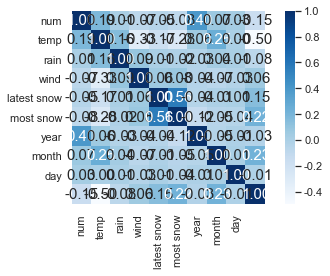

In [36]:
cols_view = ['num', 'temp', 'rain', 'wind', 'latest snow', 
             'most snow', 'year', 'month', 'day']
sns.set(font_scale = 1.0)
hm = sns.heatmap(corr.values,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size' : 15},
                yticklabels = cols_view,
                xticklabels = cols_view,
                cmap='Blues')
plt.tight_layout()
plt.show()

상관계수, 히트맵의 결과를 통해 독립변수 X들간의 상관관계가 없는 것으로 확인된다.

따라서 독립성의 가정을 만족한다.

### (5) 정규성 검정

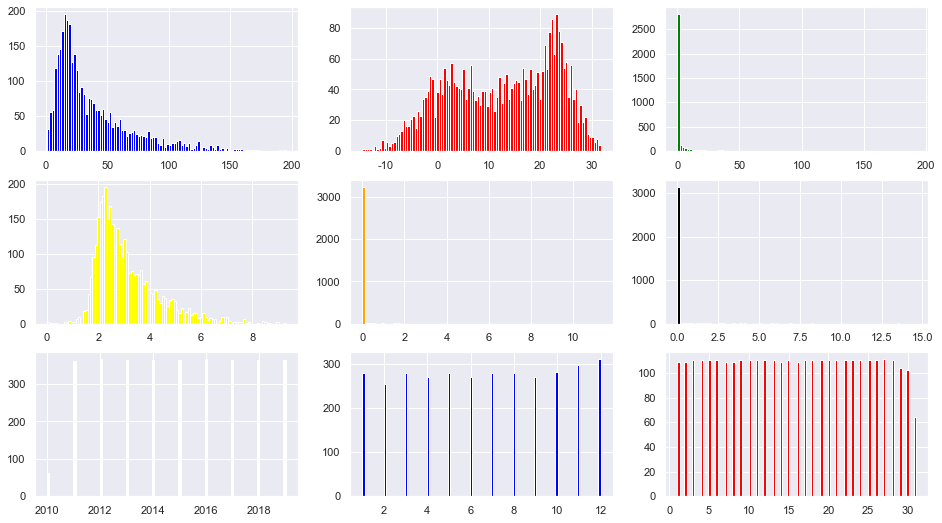

In [38]:
f, a = plt.subplots(3, 3, figsize=(16, 9))

plt.subplot(3, 3, 1)
plt.hist(new_merged['reserved_num'], color='blue', bins=100)
plt.subplot(3, 3, 2)
plt.hist(new_merged['avg_temp'], color='red', bins=100)
plt.subplot(3, 3, 3)
plt.hist(new_merged['daily_prec'], color='green', bins=100)
plt.subplot(3, 3, 4)
plt.hist(new_merged['avg_wind'], color='yellow', bins=100)
plt.subplot(3, 3, 5)
plt.hist(new_merged['latest_snow'], color='orange', bins=100)
plt.subplot(3, 3, 6)
plt.hist(new_merged['most_snow'], color='black', bins=100)
plt.subplot(3, 3, 7)
plt.hist(new_merged['year'], color='white', bins=100)
plt.subplot(3, 3, 8)
plt.hist(new_merged['month'], color='blue', bins=100)
plt.subplot(3, 3, 9)
plt.hist(new_merged['day'], color='red', bins=100)

plt.show()

독립변수들의 히스토그램을 확인해보면, **정규성을 만족하지 못한다**는 것을 알 수 있다.

### (6) 이상치

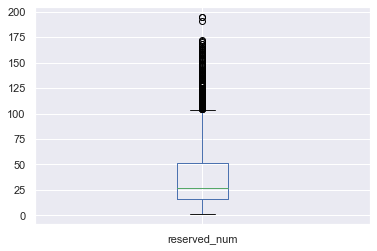

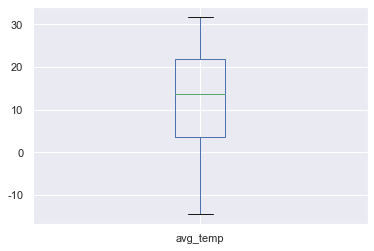

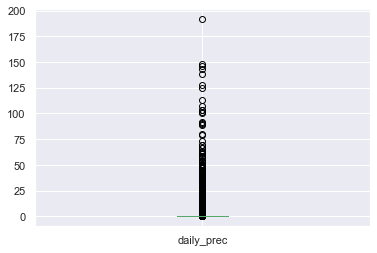

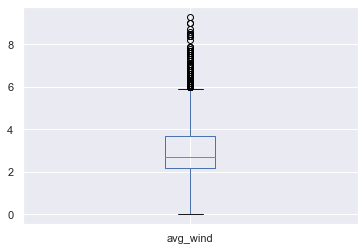

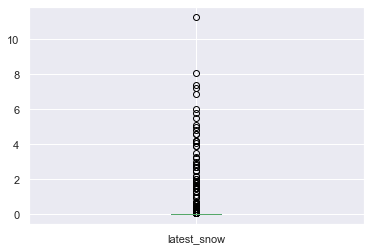

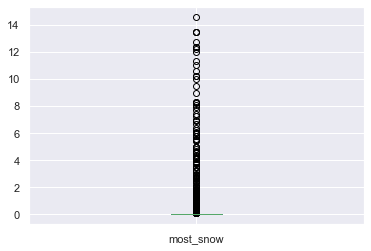

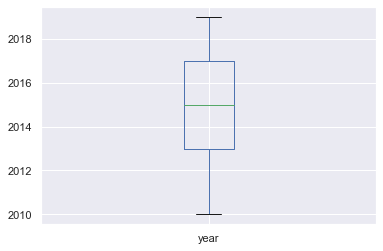

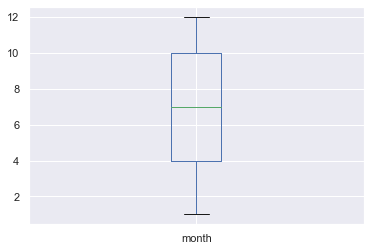

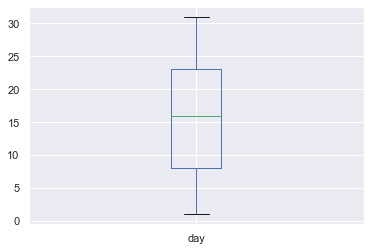

In [39]:
new_merged.plot(kind = 'box', y = 'reserved_num')
new_merged.plot(kind = 'box', y = 'avg_temp')
new_merged.plot(kind = 'box', y = 'daily_prec')
new_merged.plot(kind = 'box', y = 'avg_wind')
new_merged.plot(kind = 'box', y = 'latest_snow')
new_merged.plot(kind = 'box', y = 'most_snow')
new_merged.plot(kind = 'box', y = 'year')
new_merged.plot(kind = 'box', y = 'month')
new_merged.plot(kind = 'box', y = 'day')

변수들의 박스플롯을 그려 이상치를 확인해보았다.

reserved_num, daily_prec, avg_wind, latest_snow, most_snow 변수들이 이상치가 존재한다.

#### reserved_num의 이상치 확인

In [40]:
q1 = new_merged['reserved_num'].quantile(0.25)
q3 = new_merged['reserved_num'].quantile(0.75)

iqr = q3 - q1

re=(new_merged['reserved_num']<q1-iqr*1.5) | (new_merged['reserved_num']>q3+iqr*1.5)
new_merged[re]

,date,reserved_num,avg_temp,daily_prec,avg_wind,latest_snow,most_snow,year,month,day,season
576,2012-06-02,105,21.0,0.0,2.0,0.0,0.0,2012,6,2,2
598,2012-06-24,115,27.0,0.0,2.2,0.0,0.0,2012,6,24,2
605,2012-07-01,105,20.9,0.1,2.1,0.0,0.0,2012,7,1,2
618,2012-07-14,112,23.4,5.6,2.1,0.0,0.0,2012,7,14,2
660,2012-08-25,105,25.3,10.4,2.9,0.0,0.0,2012,8,25,2
...,...,...,...,...,...,...,...,...,...,...,...
3293,2019-11-10,148,10.8,21.4,3.2,0.0,0.0,2019,11,10,3
3299,2019-11-16,113,7.3,0.0,1.8,0.0,0.0,2019,11,16,3
3300,2019-11-17,107,9.7,23.7,3.8,0.0,0.0,2019,11,17,3
3306,2019-11-23,117,12.7,0.0,1.8,0.0,0.0,2019,11,23,3


#### 표준화(standardization)

In [41]:
from scipy import stats
new_merged['reserved_num'] = stats.zscore(new_merged['reserved_num'])

In [42]:
new_merged = new_merged[new_merged['reserved_num'].between(-1.95, 1.95)]

In [44]:
q1 = new_merged['reserved_num'].quantile(0.25)
q3 = new_merged['reserved_num'].quantile(0.75)

iqr = q3 - q1

re=(new_merged['reserved_num']<q1-iqr*1.95) | (new_merged['reserved_num']>q3+iqr*1.95)
new_merged[re]

,date,reserved_num,avg_temp,daily_prec,avg_wind,latest_snow,most_snow,year,month,day,season


이상치가 사라진 것을 확인할 수 있다.

#### 정규화

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_merged.iloc[:, 1:] = scaler.fit_transform(new_merged.iloc[:, 1:])

C:\Users\adore\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


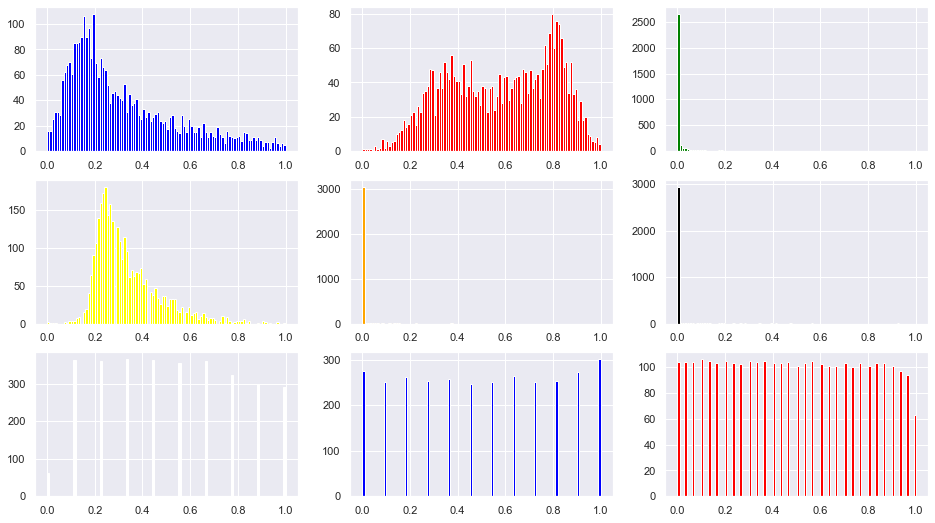

In [47]:
f, a = plt.subplots(3, 3, figsize=(16, 9))

plt.subplot(3, 3, 1)
plt.hist(new_merged['reserved_num'], color='blue', bins=100)
plt.subplot(3, 3, 2)
plt.hist(new_merged['avg_temp'], color='red', bins=100)
plt.subplot(3, 3, 3)
plt.hist(new_merged['daily_prec'], color='green', bins=100)
plt.subplot(3, 3, 4)
plt.hist(new_merged['avg_wind'], color='yellow', bins=100)
plt.subplot(3, 3, 5)
plt.hist(new_merged['latest_snow'], color='orange', bins=100)
plt.subplot(3, 3, 6)
plt.hist(new_merged['most_snow'], color='black', bins=100)
plt.subplot(3, 3, 7)
plt.hist(new_merged['year'], color='white', bins=100)
plt.subplot(3, 3, 8)
plt.hist(new_merged['month'], color='blue', bins=100)
plt.subplot(3, 3, 9)
plt.hist(new_merged['day'], color='red', bins=100)

plt.show()

정규화 하기 전 히스토그램보다 정규성 만족에 가까워졌다는 것을 확인 할 수 있다.

## 04 모델링

### (1) 데이터셋 분리

In [48]:
x = new_merged.drop(['reserved_num', 'date'], axis=1) # input
y = new_merged['reserved_num'] # target

In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state = 35, test_size = 0.25)

### (2) 선형 회귀

In [50]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.126603422448332
0.13294315618199515


In [51]:
y_predict = lr.predict(x_test)

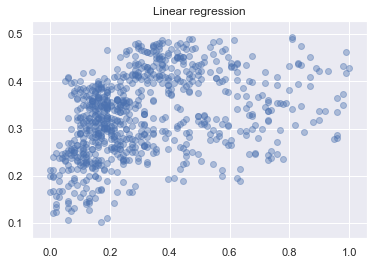

In [52]:
plt.scatter(y_test, y_predict, alpha = 0.4)
plt.title("Linear regression")
plt.show()

In [53]:
print(lr.coef_)

[ 0.06812803 -0.02486701 -0.05601181 -0.00799689  0.04926489  0.24223641
  0.05400537 -0.01110828 -0.09108544]


In [54]:
print(lr.score(x_train, y_train))

0.126603422448332


### (3) 다중 회귀

In [55]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit(x_train)
train_poly = poly.transform(x_train)
print(x_train.shape)

(2355, 9)


In [57]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x7^2',
 'x7 x8',
 'x8^2']

In [58]:
test_poly = poly.transform(x_test)

In [59]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, y_train)
print(lr.score(train_poly, y_train))

0.16007032234880225


In [60]:
print(lr.score(test_poly, y_test))

0.07723713099097274


### (4) 릿지 회귀

In [61]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [62]:
from sklearn.linear_model import Ridge # 릿지 회귀
ridge = Ridge()
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled, y_test))

0.15977178219760002
0.08376345111160222


### (5) 라쏘 회귀

In [63]:
from sklearn.linear_model import Lasso # 랏소 회귀
lasso = Lasso()
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.0
-0.0004097482704334965


### (6) 로그 변환

In [79]:
new_merged['reserved_num_log' ] = np.log1p(new_merged['reserved_num'])

In [80]:
new_merged['daily_prec_log' ] = np.log1p(new_merged['daily_prec'])
new_merged['avg_wind_log' ] = np.log1p(new_merged['avg_wind'])
new_merged['latest_snow_log' ] = np.log1p(new_merged['latest_snow'])
new_merged['most_snow_log' ] = np.log1p(new_merged['most_snow'])
# boxplot을 보고 이상치가 있는 열을 log 변환

In [89]:
from sklearn.model_selection import train_test_split

x_log = new_merged.drop(['reserved_num', 'date', 'daily_prec', 
                         'avg_wind', 'latest_snow', 'most_snow', 'reserved_num_log'], axis=1)
y_log = new_merged['reserved_num_log']

x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(
    x_log, y_log, random_state = 35, test_size = 0.25)

#### 선형 회귀

In [90]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train_log, y_train_log)
print(lr.score(x_train_log, y_train_log))
print(lr.score(x_test_log, y_test_log))

0.17368836878797977
0.18412624363986793


In [91]:
lr.fit(x_train_log, y_train_log)
print(lr.score(x_train_log, y_train_log))

0.17368836878797977


#### 다중 회귀

In [92]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit(x_train_log)
train_poly_log = poly.transform(x_train_log)
print(x_train_log.shape)

(2355, 9)


In [93]:
test_poly_log = poly.transform(x_test_log)

In [94]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly_log, y_train_log)
print(lr.score(train_poly_log, y_train_log))

0.21503496618056447


In [95]:
print(lr.score(test_poly_log, y_test_log))

0.1372384689113172


#### 라쏘 회귀

In [96]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly_log)
train_scaled_log = ss.transform(train_poly_log)
test_scaled_log = ss.transform(test_poly_log)

In [97]:
from sklearn.linear_model import Lasso # 라쏘 회귀
lasso = Lasso()
lasso.fit(train_scaled_log, y_train_log)
print(lasso.score(train_scaled_log, y_train_log))
print(lasso.score(test_scaled_log, y_test_log))

0.0
-8.260307194407623e-05


#### 릿지 회귀

In [98]:
from sklearn.linear_model import Ridge # 릿지 회귀
ridge = Ridge()
ridge.fit(train_scaled_log, y_train_log)
print(ridge.score(train_scaled_log, y_train_log))
print(ridge.score(test_scaled_log, y_test_log))

0.21476337817101965
0.14259950730473492


전체적으로 예측률이 많이 떨어진다.

날씨와 같이 시계열적인 요소가 들어가서 그런 것으로 예상된다.

### (7) 랜덤포레스트

In [103]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(new_merged['reseved_num'], trace=True,
                         suppress_warnings=True)

ModuleNotFoundError: No module named 'pmdarima'

In [101]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(y_train, order = (1, 0, 5))
model = model.fit()
model.summary()

C:\Users\adore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           reserved_num   No. Observations:                 2355
Model:                     ARMA(1, 5)   Log Likelihood                  68.327
Method:                       css-mle   S.D. of innovations              0.235
Date:                Fri, 28 May 2021   AIC                           -120.653
Time:                        17:34:26   BIC                            -74.539
Sample:                             0   HQIC                          -103.861
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3178      0.005     66.083      0.000       0.308       0.327
ar.L1.reserved_num    -0.0464      0.792     -0.059      0.953      -1.599       1.506
ma.L1.reserved_num     0.0559      0.792      0.071      0.944      -1.496       1.608
ma.L2.reserved_num    -0.0108      0.022     -0.497      0.619      -0.053       0.032
ma.L3.reserved_num     0.0066      0.023      0.285      0.776      -0.039       0.052
ma.L4.reserved_num     0.0199      0.021      0.965      0.335      -0.021       0.060
ma.L5.reserved_num    -0.0327      0.027     -1.217      0.224      -0.085       0.020
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -21.5681           +0.0000j           21.5681            0.5000
MA.1           -1.5028           -1.0933j            1.8584           -0.3999
MA.2           -1.5028           +1.0933j            1.8584            0.3999
MA.3            0.7214           -1.8856j            2.0189           -0.1918
MA.4            0.7214           +1.8856j            2.0189            0.1918
MA.5            2.1724           -0.0000j            2.1724           -0.0000
-----------------------------------------------------------------------------
"""